In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import matplotlib.pyplot as plt

# Load the IMDB dataset
max_features = 10000
maxlen = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)

# Pad sequences to the same length
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)


17464789/17464789 [==============================] - 0s 0us/step


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

embedding_size = 128
gru_units = 64

model = Sequential()
model.add(Embedding(max_features, embedding_size, input_length=maxlen))
model.add(GRU(gru_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,317,313
Trainable params: 1,317,313
Non-trainable params: 0
_________________________________________________________________


In [ ]:
batch_size = 32
epochs = 5

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)


Epoch 1/5
704/704 [==============================] - 322s 445ms/step - loss: 0.4384 - accuracy: 0.7929 - val_loss: 0.3346 - val_accuracy: 0.8672
Epoch 2/5
704/704 [==============================] - 307s 436ms/step - loss: 0.2533 - accuracy: 0.8998 - val_loss: 0.3185 - val_accuracy: 0.8740
Epoch 3/5
704/704 [==============================] - 308s 438ms/step - loss: 0.1727 - accuracy: 0.9357 - val_loss: 0.3796 - val_accuracy: 0.8616
Epoch 4/5
704/704 [==============================] - 308s 438ms/step - loss: 0.1152 - accuracy: 0.9589 - val_loss: 0.3540 - val_accuracy: 0.8680
Epoch 5/5
704/704 [==============================] - 309s 439ms/step - loss: 0.0695 - accuracy: 0.9760 - val_loss: 0.4125 - val_accuracy: 0.8696


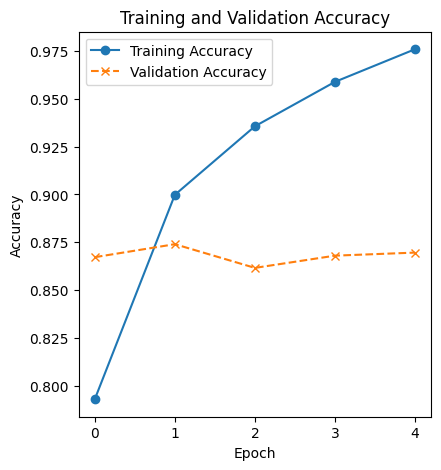

In [ ]:

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()


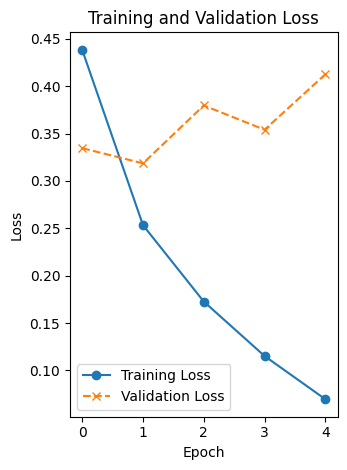

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', linestyle='-', marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='--', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()